Question 1. Train a shallow neural network containing a single hidden layer of 100 neurons on the Fashion-MNIST training data by using the following options:

1. logistic loss  
2. stochastic gradient descent (with mini-batch size of your own choice)  
3. the best learning rate (out of at least 5 different values)  
and use it to classify the test data. What kind of accuracy did you achieve, and how long did it take to train the network (with the best learning rate you found)?

Question 2. Repeat Question 1 with the logistic loss + regularization (L1 or L2). You can use the best learning rate from Question 1 but need to tune the regularization parameter (by trying and comparing at least 5 different values). What is your best test accuracy?

Question 3 (open exploration). Try something new, such as a new activation function, a new loss function (including square loss), or a different design (e.g., more neurons on the hidden layer or more layers). Is the test accuracy better than that in Question 2?


#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
import tensorflow as tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images/255
test_images = test_images/255

"""
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_all = np.vstack((X_train,X_test))
labels = np.hstack((train_labels,test_labels))
"""

'\nX_train = np.zeros([60000,784]) \nfor i in range(60000): \n    img=train_images[i,:,:]\n    X_train[i,:] = img.reshape([784])\n\nX_test = np.zeros([10000,784]) \nfor i in range(10000):\n    img=test_images[i,:,:]\n    X_test[i,:] = img.reshape([784])\n\nX_all = np.vstack((X_train,X_test))\nlabels = np.hstack((train_labels,test_labels))\n'

#1

In [ ]:
LR_list=[.0001,.0005,.001,.005,.0075,.01]
accs=[]

for LR in LR_list:
    model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(100, activation ='relu'),
                tf.keras.layers.Dense(100, activation ='relu'),
                tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

    model.fit(train_images, train_labels,batch_size=50,epochs=20)
    probs = model.predict(test_images)
    preds=np.argmax(probs,axis=1)
    accs.append(accuracy_score(y_true = test_labels,y_pred=preds))

print(LR_list)
print(accs)

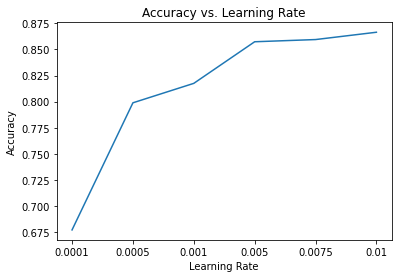

In [7]:
LR_list = [0.0001, 0.0005, 0.001, 0.005, 0.0075, 0.01]
acc_list = [0.6773, 0.7989, 0.8175, 0.8573, 0.8594, 0.8664]

plt.plot(range(6),acc_list)
plt.xticks(range(6),labels=LR_list)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate');

In [10]:
LR_list=[.01,.02,.03,.04,.05,.06,.07,.08,.09,0.1]
accs=[]

for LR in LR_list:
    model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(100, activation ='relu'),
                tf.keras.layers.Dense(100, activation ='relu'),
                tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                loss='SparseCategoricalCrossentropy',
                metrics=['accuracy'])

    model.fit(train_images, train_labels,batch_size=50,epochs=20)
    probs = model.predict(test_images)
    preds=np.argmax(probs,axis=1)
    accs.append(accuracy_score(y_true = test_labels,y_pred=preds))

print(LR_list)
print(accs)

Epoch 1/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.8459 - accuracy: 0.7219
Epoch 2/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.8163
Epoch 3/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4806 - accuracy: 0.8329
Epoch 4/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4516 - accuracy: 0.8422
Epoch 5/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4317 - accuracy: 0.8483
Epoch 6/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4159 - accuracy: 0.8548
Epoch 7/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4037 - accuracy: 0.8592
Epoch 8/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3931 - accuracy: 0.8626
Epoch 9/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3833 - accuracy: 0.8658
Epoch 10/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.376

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  
[0.8665, 0.8749, 0.8837, 0.8863, 0.8855, 0.8811, 0.8742, 0.8893, 0.8871, 0.8864]

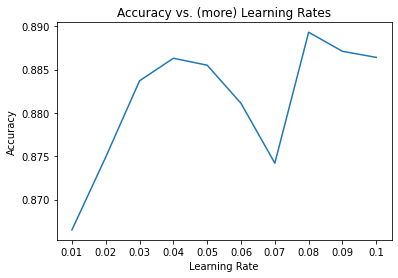

In [11]:
plt.plot(range(10),accs)
plt.xticks(range(10),labels=LR_list)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. (more) Learning Rates');